<a href="https://colab.research.google.com/github/Godbolemanvi/Capstone-06-Heart_Disease_Prediction/blob/main/Framingham_Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="center" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="" size=15px>
                    <b>Heart Disease Prediction
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement

In this era of automation and technologies, the healthcare industry is inclined towards machine learning techniques to diagnose diseases at an early stage and help the patients with its enormous availability of data. Coronary heart disease (CHD) is the most common type of heart disease, where major blood vessels are damaged which supply blood to the heart. CHD’s or CVD’s or heart diseases are the leading cause of death worldwide where it makes up almost sixteen percent of all deaths. So, we have used classification algorithms to train the machine to diagnose heart disease or CHD.

<a id='import_lib'></a>
## 1. Import Libraries

**Let us import the required libraries and functions**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
#import lightgbm as lgb

from scipy.stats import randint as sp_randint

In [ ]:
df = pd.read_csv('US_Heart_Patients.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Data Definition

Demographic:

- Sex: male or female(Nominal)

- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral

- Current Smoker: whether or not the patient is a current smoker (Nominal)

- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)

- BP Meds: whether or not the patient was on blood pressure medication (Nominal)

- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

- Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current)

- Tot Chol: total cholesterol level (Continuous)

- Sys BP: systolic blood pressure (Continuous)

- Dia BP: diastolic blood pressure (Continuous)

- BMI: Body Mass Index (Continuous)

- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

- Glucose: glucose level (Continuous)

Predict variable (desired target)

- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

<a id='Read_Data'></a>
## 2. Read Data

In [ ]:
df.columns = ['Sex','Age','Education','CurrentSmoker','CigsPerDay','BPMeds','PrevalentStroke','PrevalentHyp','Diabetes','TotChol','SysBP','DiaBP','BMI','HeartRate','Glucose','TenYearCHD']
df.head()

,Sex,Age,Education,CurrentSmoker,CigsPerDay,BPMeds,PrevalentStroke,PrevalentHyp,Diabetes,TotChol,SysBP,DiaBP,BMI,HeartRate,Glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df = df.drop(columns=['Education'])

<a id='Data_Types'></a>
# 3. Data Analysis and Preparation

<a id='Data_Types'></a>
### 3.1  Checking dimensions 

In [ ]:
df.shape

(4240, 15)

<a id='Data_Types'></a>
### 3.2 Checking the Data Types 
Data has a variety of data types. The main types stored in pandas dataframes are object, float, int64, bool and datetime64. In order to learn about each attribute, it is always good for us to know the data type of each column.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              4240 non-null   int64  
 1   Age              4240 non-null   int64  
 2   CurrentSmoker    4240 non-null   int64  
 3   CigsPerDay       4211 non-null   float64
 4   BPMeds           4187 non-null   float64
 5   PrevalentStroke  4240 non-null   int64  
 6   PrevalentHyp     4240 non-null   int64  
 7   Diabetes         4240 non-null   int64  
 8   TotChol          4190 non-null   float64
 9   SysBP            4240 non-null   float64
 10  DiaBP            4240 non-null   float64
 11  BMI              4221 non-null   float64
 12  HeartRate        4239 non-null   float64
 13  Glucose          3852 non-null   float64
 14  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB


<a id='Summary_Statistics'></a>
### 3.3 Summary Statistics

#### 1. For numerical variables, we use .describe()

In [ ]:
df.describe()

,Sex,Age,CurrentSmoker,CigsPerDay,BPMeds,PrevalentStroke,PrevalentHyp,Diabetes,TotChol,SysBP,DiaBP,BMI,HeartRate,Glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


<a id='Missing_Values'></a>
### 3.4 Missing Values

In [ ]:
df.isnull().sum()

Sex                  0
Age                  0
CurrentSmoker        0
CigsPerDay          29
BPMeds              53
PrevalentStroke      0
PrevalentHyp         0
Diabetes             0
TotChol             50
SysBP                0
DiaBP                0
BMI                 19
HeartRate            1
Glucose            388
TenYearCHD           0
dtype: int64

The missing values are present in the data for the CigsPerDay, BPMeds, TotChol, HeartRate, Glucoseand bmi variables. There are 29, 53, 50, 19 and 388 missing values for the variables respectively. 

In [ ]:
l = ['CigsPerDay', 'BPMeds', 'TotChol', 'HeartRate', 'BMI', 'Glucose', 'PrevalentStroke', 'Diabetes',
    'SysBP', 'DiaBP']
for i in l:
    df[i] = df[i].replace(np.nan, df[i].mean())

In [ ]:
df.isnull().sum()

Sex                0
Age                0
CurrentSmoker      0
CigsPerDay         0
BPMeds             0
PrevalentStroke    0
PrevalentHyp       0
Diabetes           0
TotChol            0
SysBP              0
DiaBP              0
BMI                0
HeartRate          0
Glucose            0
TenYearCHD         0
dtype: int64

<a id='correlation'></a>
### 3.5 Correlation

- Correlation is the extent of linear relationship among numeric variables</li>
- It indicates the extent to which two variables increase or decrease in parallel</li>
- The value of a correlation coefficient ranges between -1 and 1</li>
- Correlation among multiple variables can be represented in the form of a matrix. This allows us to see which pairs are correlated

#### Call the corr() function which will return the correlation matrix.

In [ ]:
corr = df.corr()
corr

,Sex,Age,CurrentSmoker,CigsPerDay,BPMeds,PrevalentStroke,PrevalentHyp,Diabetes,TotChol,SysBP,DiaBP,BMI,HeartRate,Glucose,TenYearCHD
Sex,1.000000,-0.029014,0.197026,0.316023,-0.052203,-0.004550,0.005853,0.015693,-0.070064,-0.035879,0.058199,0.081705,-0.116913,0.005718,0.088374
Age,-0.029014,1.000000,-0.213662,-0.192534,0.122036,0.057679,0.306799,0.101314,0.260691,0.394053,0.205586,0.135578,-0.012839,0.116951,0.225408
CurrentSmoker,0.197026,-0.213662,1.000000,0.767055,-0.048621,-0.032980,-0.103710,-0.044285,-0.046211,-0.130281,-0.107933,-0.167483,0.062678,-0.054062,0.019448
CigsPerDay,0.316023,-0.192534,0.767055,1.000000,-0.045847,-0.032711,-0.066444,-0.037086,-0.026182,-0.088523,-0.056473,-0.092888,0.075257,-0.056020,0.057646
BPMeds,-0.052203,0.122036,-0.048621,-0.045847,1.000000,0.115008,0.259125,0.051584,0.078973,0.252023,0.192387,0.099586,0.015172,0.048925,0.086805
PrevalentStroke,-0.004550,0.057679,-0.032980,-0.032711,0.115008,1.000000,0.074791,0.006955,0.000105,0.057000,0.045153,0.024856,-0.017674,0.018065,0.061823
PrevalentHyp,0.005853,0.306799,-0.103710,-0.066444,0.259125,0.074791,1.000000,0.077752,0.162683,0.696656,0.615840,0.300599,0.146777,0.082757,0.177458
Diabetes,0.015693,0.101314,-0.044285,-0.037086,0.051584,0.006955,0.077752,1.000000,0.040161,0.111265,0.050260,0.086282,0.048986,0.605709,0.097344
TotChol,-0.070064,0.260691,-0.046211,-0.026182,0.078973,0.000105,0.162683,0.040161,1.000000,0.207436,0.163423,0.115013,0.090678,0.044710,0.081807
SysBP,-0.035879,0.394053,-0.130281,-0.088523,0.252023,0.057000,0.696656,0.111265,0.207436,1.000000,0.783952,0.325172,0.182084,0.134561,0.216374


#### Pass the correlation matrix to the heatmap() function of the seaborn library to plot the heatmap of the correlation matrix

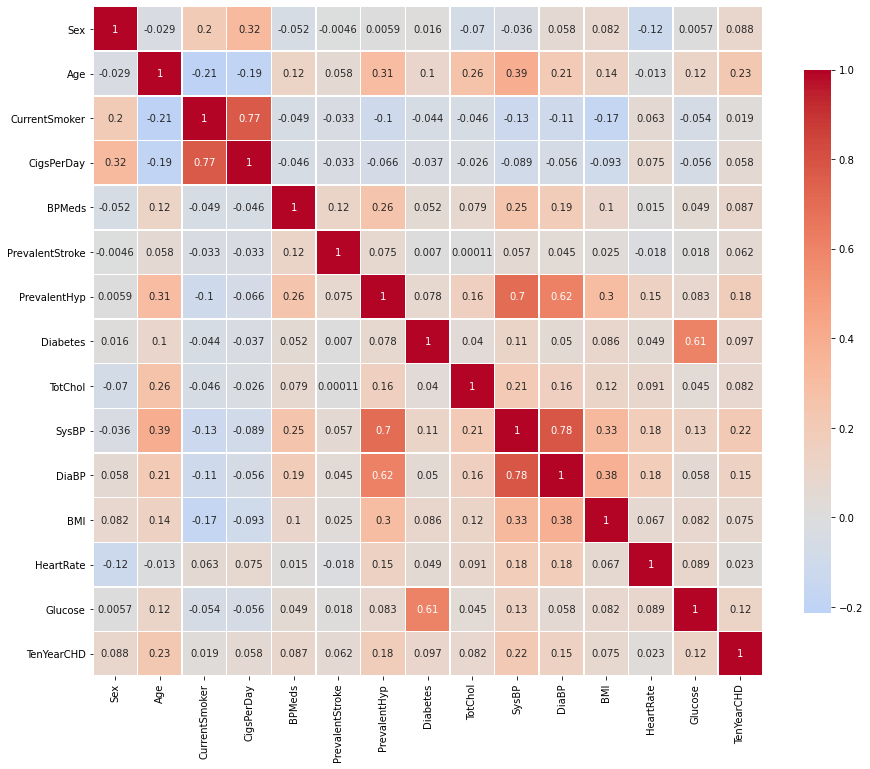

In [ ]:
plt.figure(figsize=(15,20))
sns.heatmap(df.corr(),cmap='coolwarm', center=0, square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5})
plt.show()

#### Observation

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21612C">
                    <b>From the above heatmap we see that:<ul>
                        <li> Variables 'currentSmoker' and 'cigsPerDay' are highly correlated.</li>
                        <li>Variables 'sysBP' and 'diaBP' are highly correlated.</li>
                        <li>From our histogram we can see that 'cigsPerDay' have more 0 values. Hence we can try and drop that column from our data.</li>
                        <li>Also we know that 'sysBP' and 'diaBP' are supposed to be dependant on eachother,as they help in generating the blood pressure of paitents. So it is wise not to drop any of those columns.
</li>
                 </font>
            </div>
        </td>
    </tr>
</table>


### 3.6 Categorical Data Analysis

Categorical variables are those in which the values are labeled categories. The values, distribution, and dispersion of categorical variables are best understood with bar plots.

In [ ]:
categorical_features = ['Sex', 'CurrentSmoker', 'BPMeds', 'PrevalentStroke', 'PrevalentHyp', 'Diabetes']

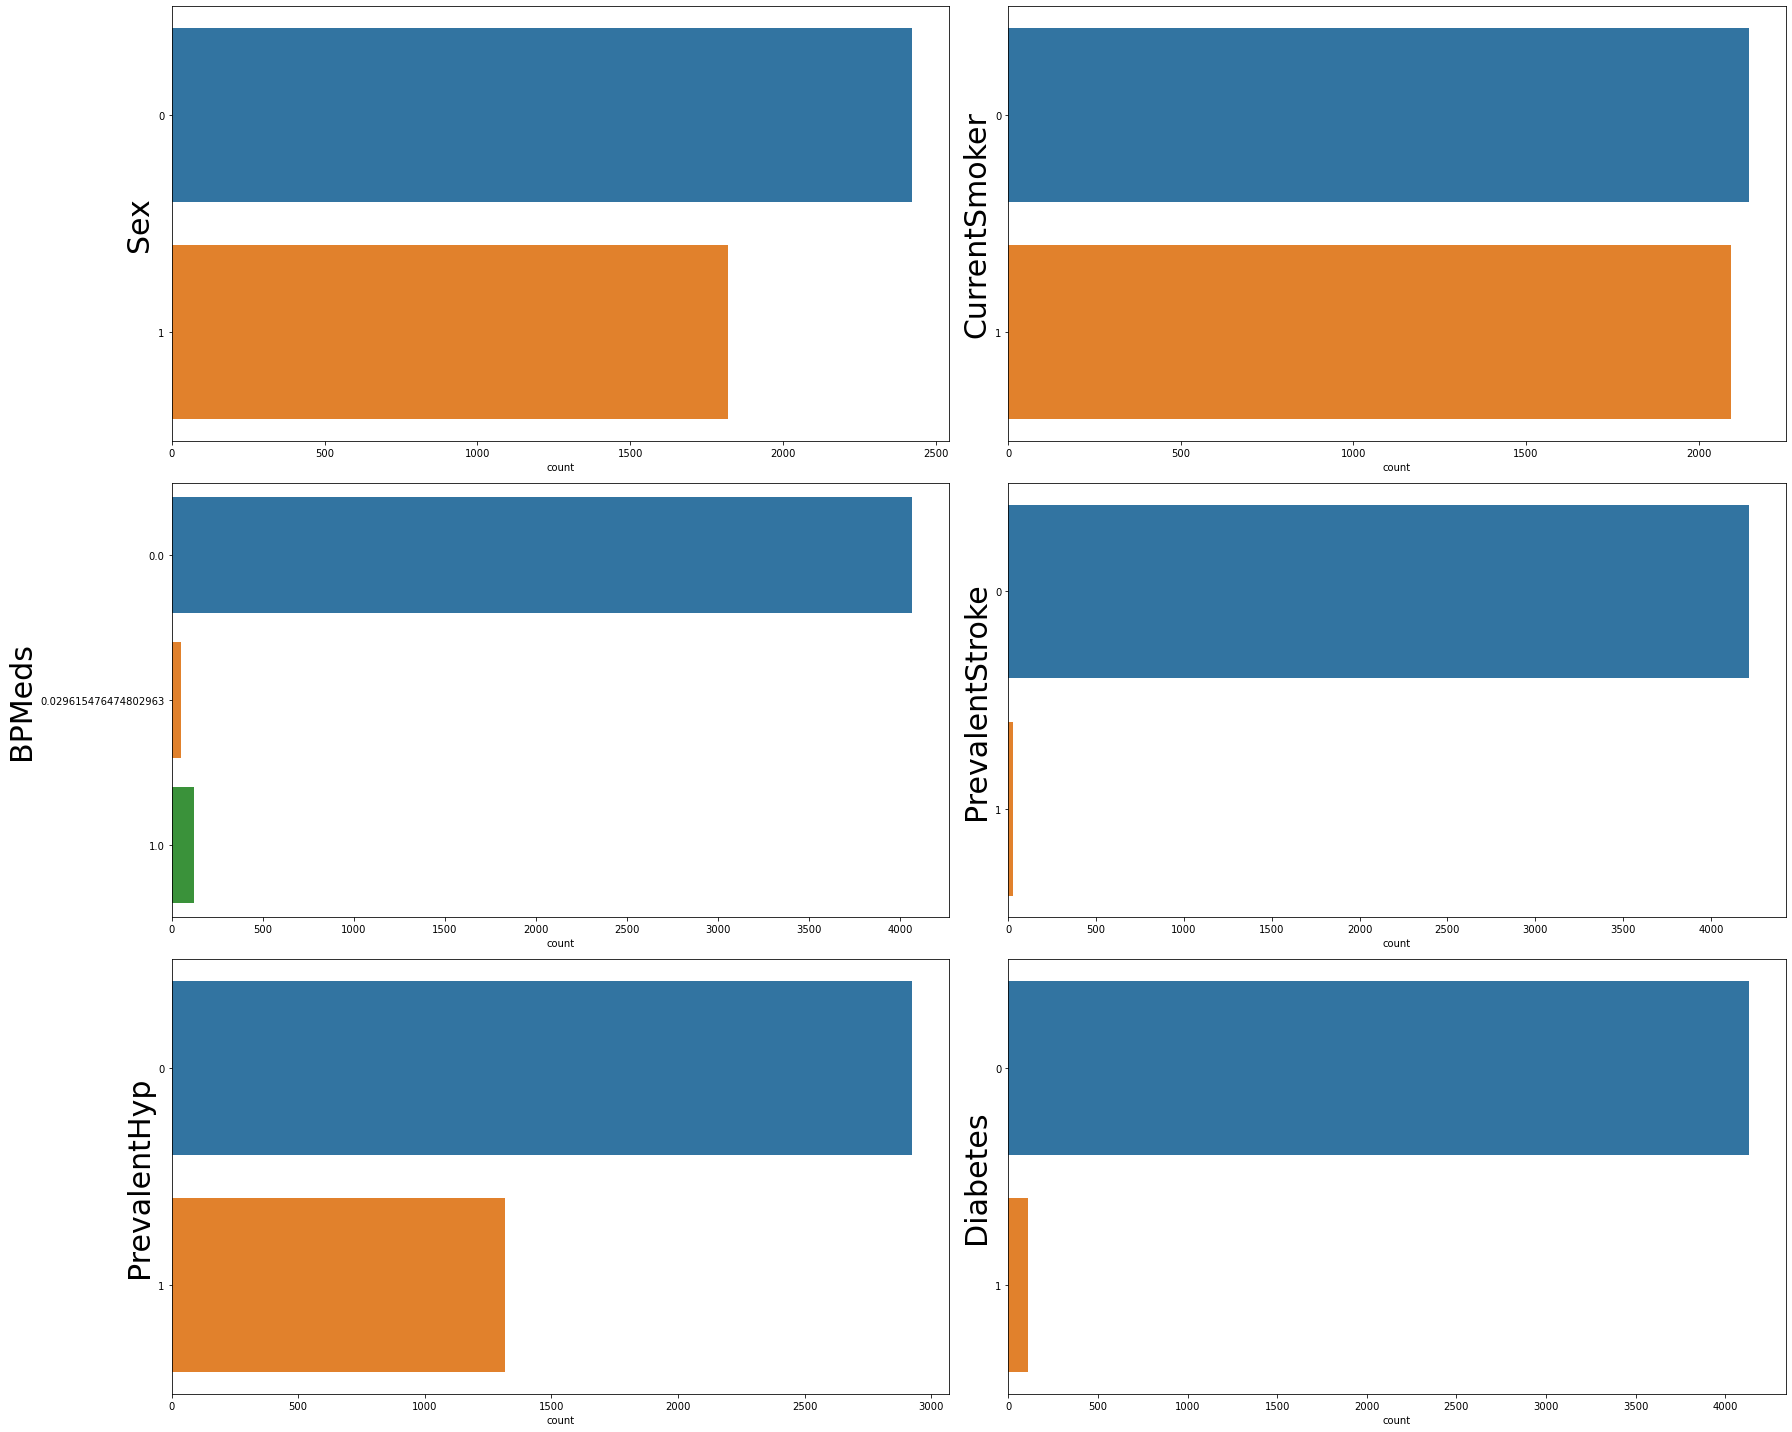

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(25, 20))
for variable, subplot in zip(categorical_features, ax.flatten()):
    countplot = sns.countplot(y=df[variable], ax=subplot )
    countplot.set_ylabel(variable, fontsize = 30)  
plt.tight_layout()   
plt.show()

#### Observation

<table align="left">
    <tr>
        
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21612C">
                    <b>From the above plot we see that:<ul>
                        <li> The number of males are femals are not equal</li>
                        <li>BPmeds, prevalentStroke and diabetes are highly imbalanced.</li>
                        <li> The number of Smokers and non-Smokers in currentSmoker is almost the same</li>
                        
                        </ul></b>
                </font>
            </div>
        </td>
    </tr>
</table>

# 3.7 Numerical Features analysis

In [ ]:
numeric_features = ['CigsPerDay', 'TotChol', 'SysBP', 'DiaBP', 'BMI', 'HeartRate', 'Glucose']

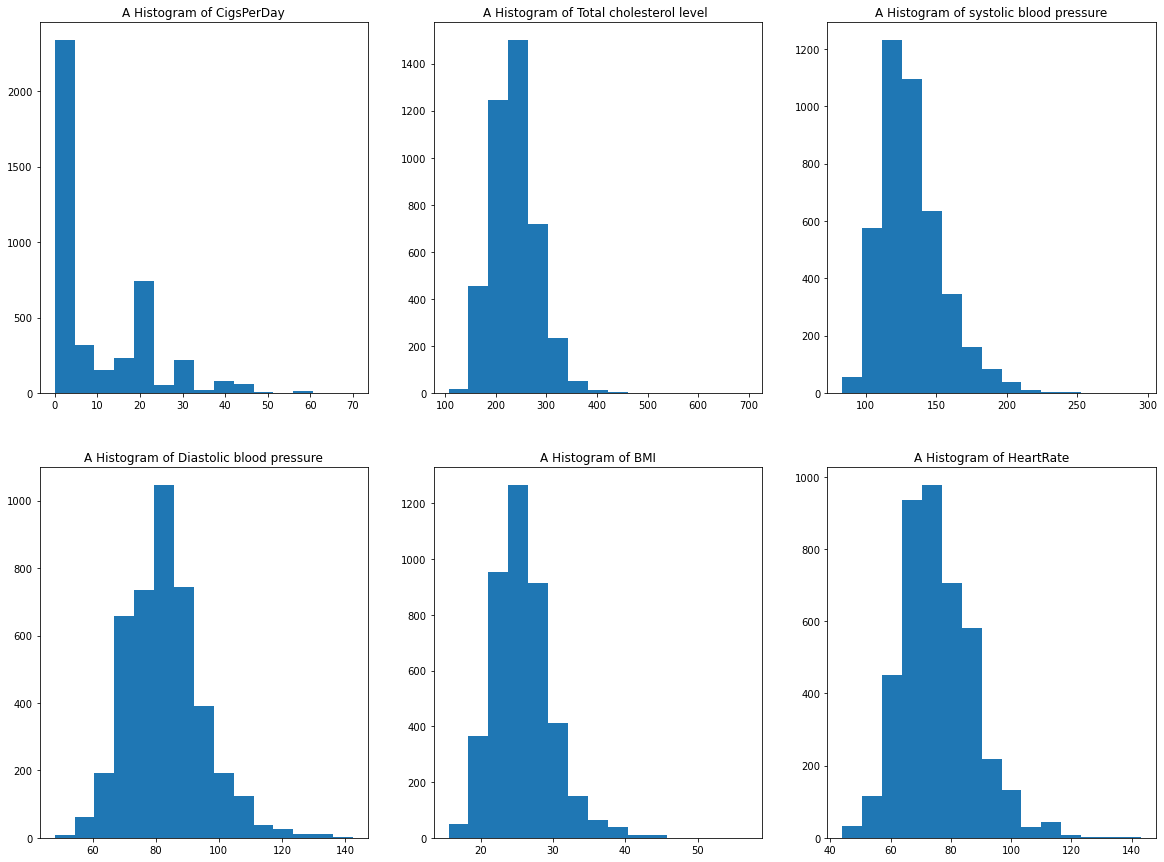

In [ ]:
fig = plt.figure(figsize=(20, 15))
plt.subplot(2,3,1)
plt.hist(df['CigsPerDay'], bins = 15)
plt.title('A Histogram of CigsPerDay')

plt.subplot(2,3,2)
plt.hist(df['TotChol'], bins = 15)
plt.title('A Histogram of Total cholesterol level ')

plt.subplot(2,3,3)
plt.hist(df['SysBP'], bins = 15)
plt.title('A Histogram of systolic blood pressure')

plt.subplot(2,3,4)
plt.hist(df['DiaBP'], bins = 15)
plt.title('A Histogram of Diastolic blood pressure')

plt.subplot(2,3,5)
plt.hist(df['BMI'], bins = 15)
plt.title('A Histogram of BMI')

plt.subplot(2,3,6)
plt.hist(df['HeartRate'], bins = 15)
plt.title('A Histogram of HeartRate')

plt.show()

#### Observation


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21612C">
                    <b>From the above plot we see that:<ul>
                        <li> totChol, sysBP, diaBPand BMI has an uniform distribution and the rest are unevenly distributed</li>
                        <li>cigsPerDay has a highly uneven distribution with the most data present in 0 </li>
                        <li> cigsPerDay and sysBP shows quite a bit and slight right skewness respectively</li>
                        <li>cigsPerDay has uneven distribution although most of the data is concentrated on 0</li>
                 </font>
            </div>
        </td>
    </tr>
</table>

### 3.8 Analysis with Target Variable

In [ ]:
print("The average person with 10-year risk of future coronary heart disease (CHD) {:.4f} ".format(df['TenYearCHD'].mean()))

The average person with 10-year risk of future coronary heart disease (CHD) 0.1519 


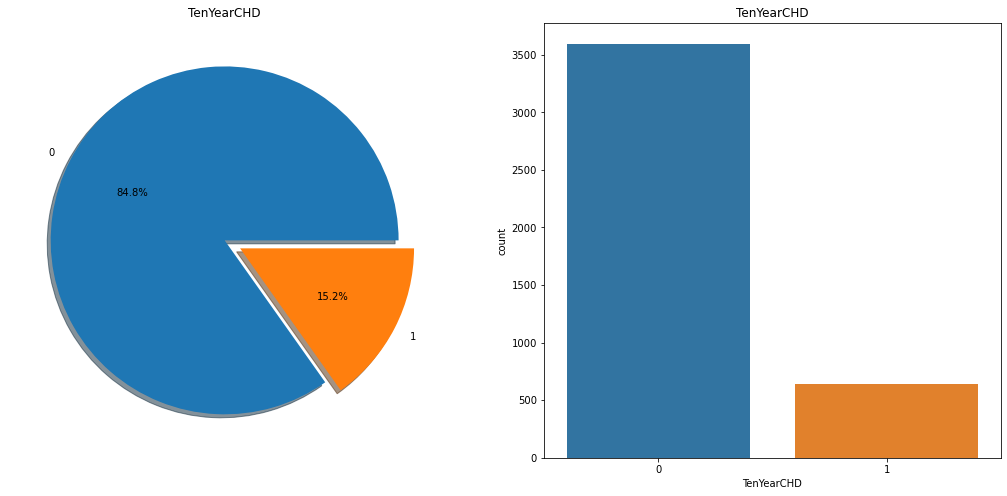

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['TenYearCHD'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('TenYearCHD')
ax[0].set_ylabel('')
sns.countplot('TenYearCHD',data=df,ax=ax[1])
ax[1].set_title('TenYearCHD')
plt.show()

#### Observation

<table align="left">
    <tr>
        
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21612C">
                    <b>The distribution is highly imbalanced. As in, the number of negative cases outweigh the number of positive cases. </b>
                    <b>    This would lead to class imbalance problem while fitting our models. </b>
                     <b>   Therefore, this problem needs to be addressed and taken care of.

</b>
                </font>
            </div>
        </td>
    </tr>
</table>

## 3.9 Relationship between other variables and target variable

In [ ]:
print('Oldest patient was of:',df['Age'].max(),'Years')
print('Youngest patient was of:',df['Age'].min(),'Years')
print('Average Age of the patient:',df['Age'].mean(),'Years')

Oldest patient was of: 70 Years
Youngest patient was of: 32 Years
Average Age of the patient: 49.58018867924528 Years


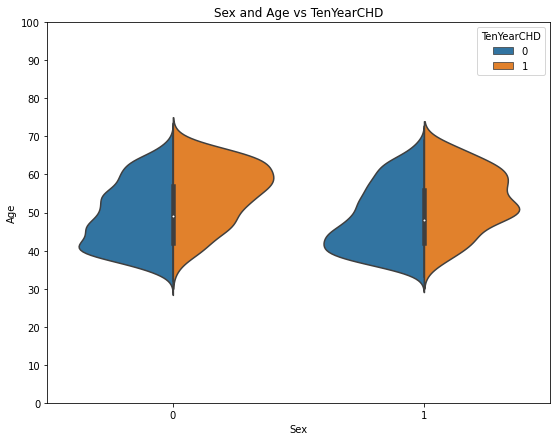

In [ ]:
fig, ax = plt.subplots(figsize =(9, 7))
sns.violinplot("Sex","Age", hue="TenYearCHD", data=df,split=True)
ax.set_title('Sex and Age vs TenYearCHD')
ax.set_yticks(range(0,110,10))
plt.show()

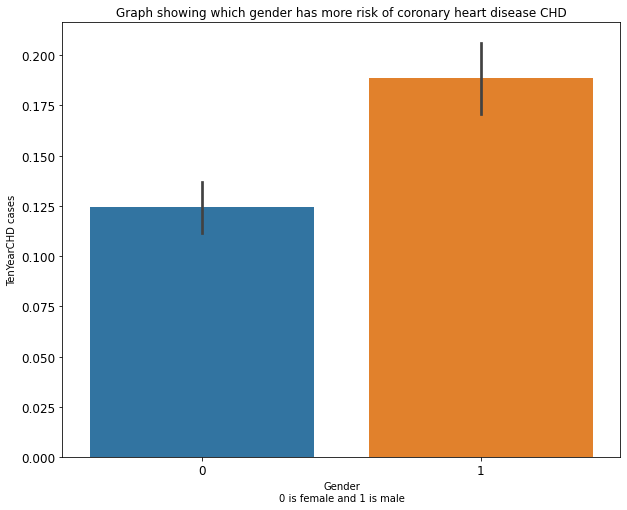

In [ ]:
plt.figure(figsize=(10,8), facecolor='w')
sns.barplot(x=df["Sex"], y=df["TenYearCHD"])
plt.title("Graph showing which gender has more risk of coronary heart disease CHD")
plt.xlabel("Gender\n0 is female and 1 is male")
plt.ylabel("TenYearCHD cases")
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

#### Observation


<table align="left">
    <tr>
        
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21612C">
                    <b>From the above graph, we can see that the males have shown a slighly higher risk of coronary heart disease TenYearCHD.

</b>
                </font>
            </div>
        </td>
    </tr>
</table>

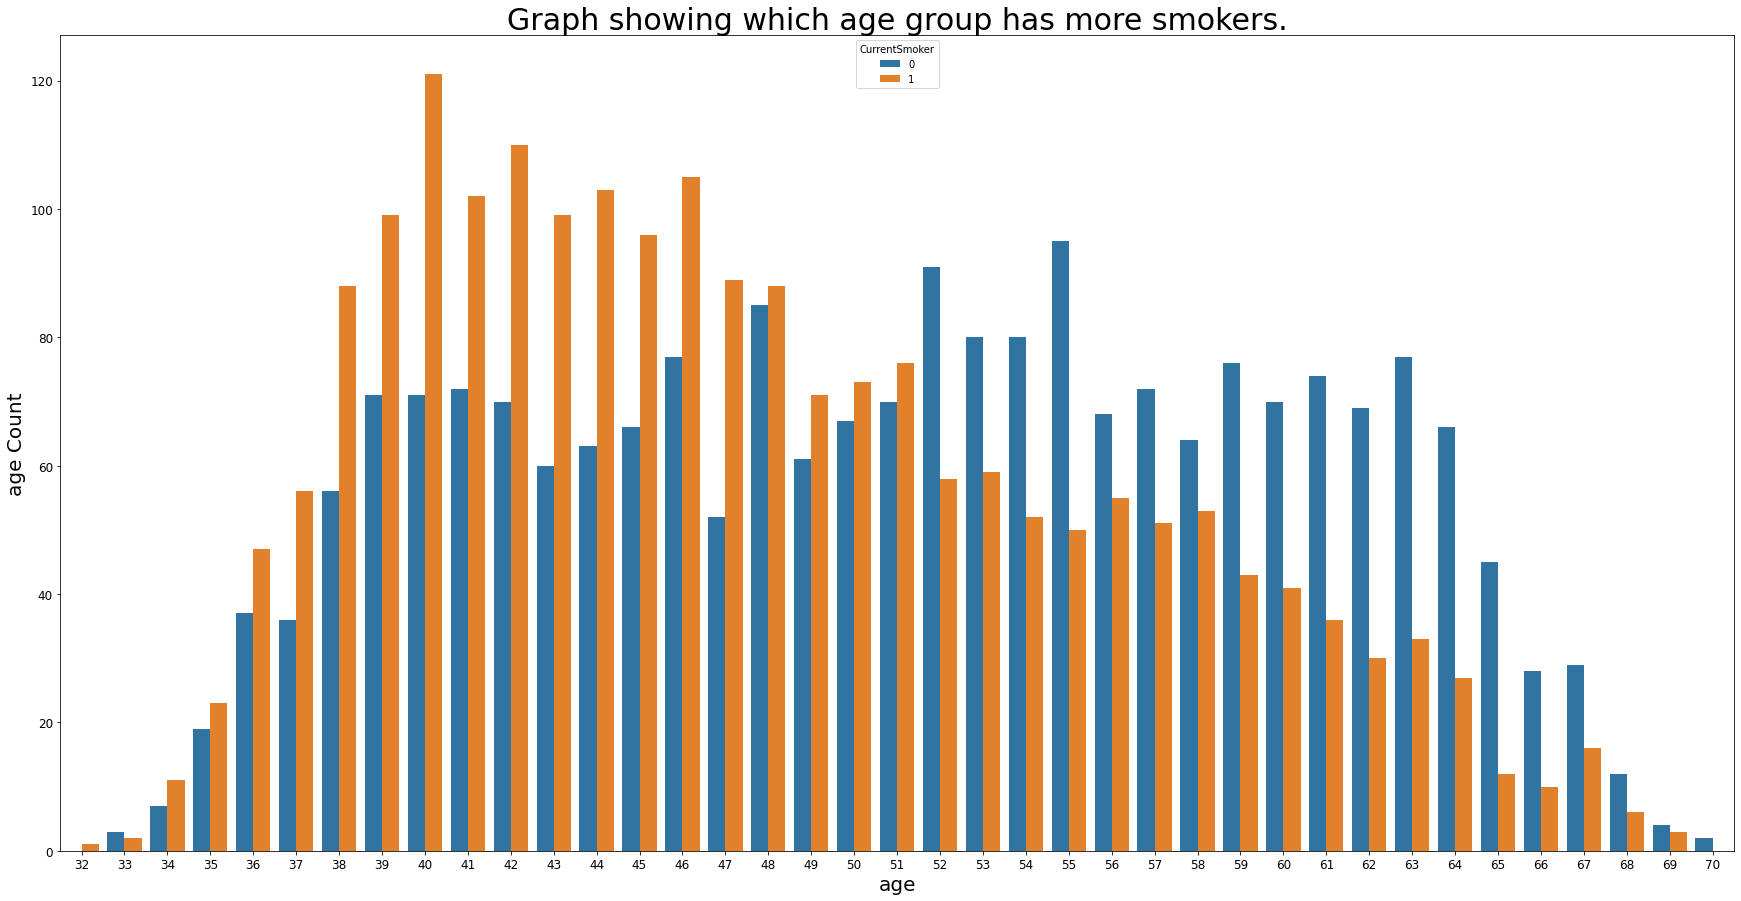

In [ ]:
plt.figure(figsize=(30,15), facecolor='w')
sns.countplot(x="Age",data=df,hue="CurrentSmoker")
plt.title("Graph showing which age group has more smokers.", size=30)
plt.xlabel("age", size=20)
plt.ylabel("age Count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

#### Observation


<table align="left">
    <tr>
        
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21612C">
                    <b>From the above plot we see that:<ul>
                        <li> we can say between 35-50 age , the risk of having CHD is more</li>
                           <li>No currentSmokers observed below the age of 32</li>
                         <li>maximum age for a currentSmokers is 70</li>
                        
                        </ul></b>
                </font>
            </div>
        </td>
    </tr>
</table>

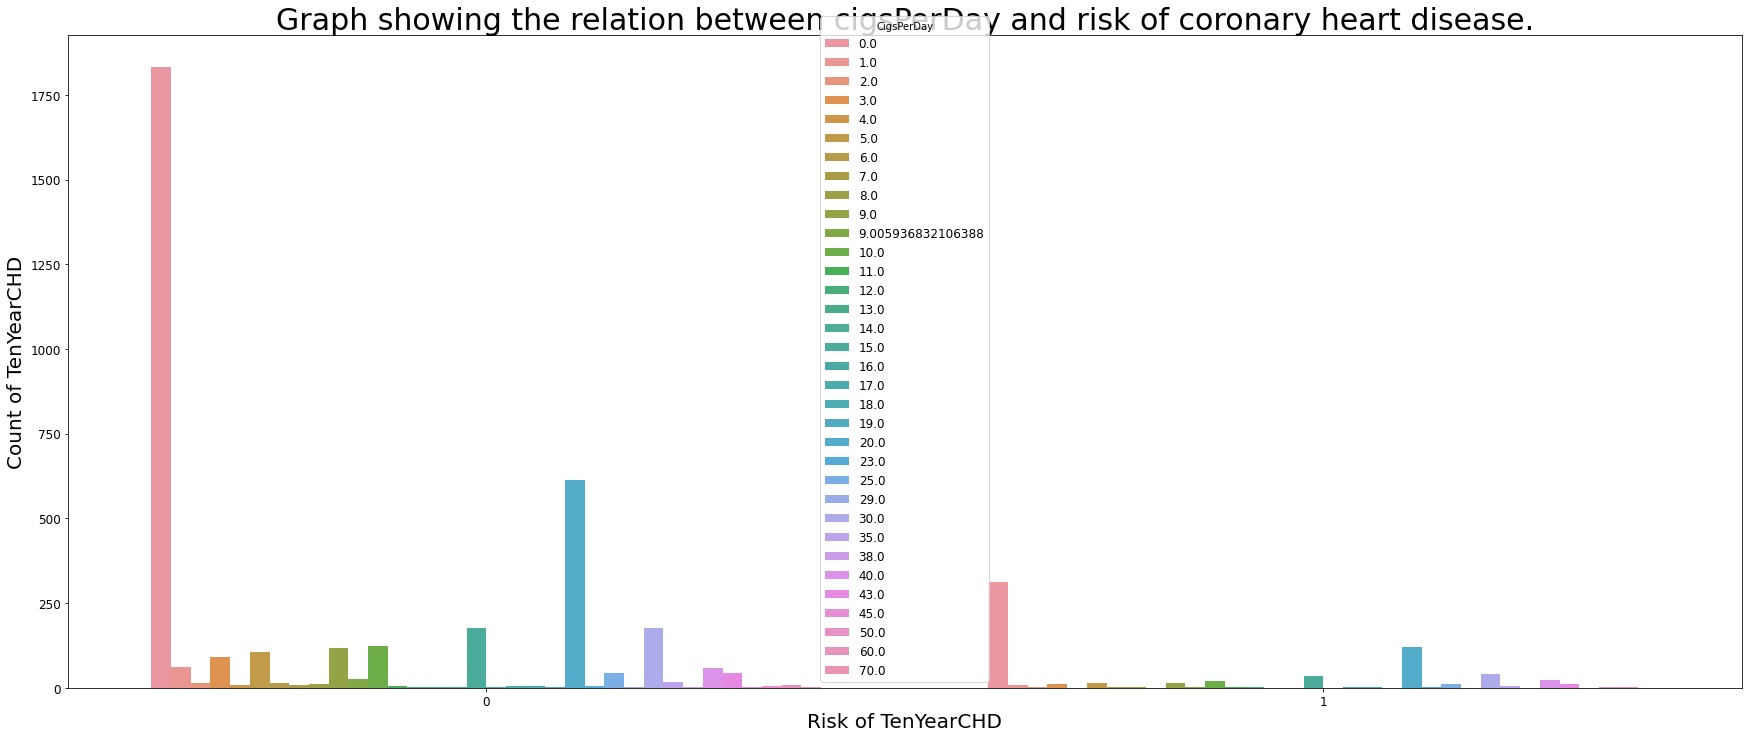

In [ ]:
plt.figure(figsize=(30,12), facecolor='w')
sns.countplot(x="TenYearCHD",data=df,hue="CigsPerDay")
plt.legend(title='CigsPerDay', fontsize='large')
plt.title("Graph showing the relation between cigsPerDay and risk of coronary heart disease.", size=30)
plt.xlabel("Risk of TenYearCHD", size=20)
plt.ylabel("Count of TenYearCHD", size=20)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

#### Observation


<table align="left">
    <tr>
        
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21612C">
                    <b>From the above plot we see that:<ul>
                        <li>Low cigsPerDay comes with lower risk of CHD.</li>
                        <li>Those who don't smoke, i.e., with a cigsPerDay of 0.0 has a really low risk of contracting the disease</li>
                        <li>Although that is the case, low cigsPerDay doesn't actually guarantee a much lower risk of CHD</li>
                        
                        </ul></b>
                </font>
            </div>
        </td>
    </tr>
</table>

<Figure size 864x576 with 0 Axes>

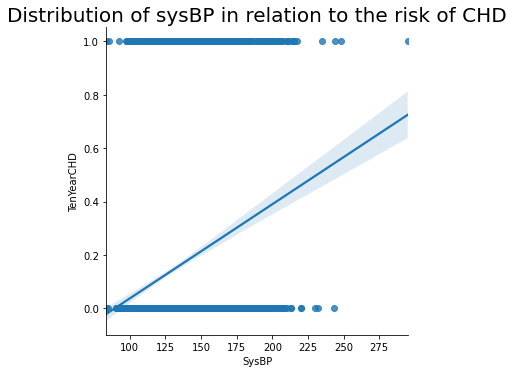

In [ ]:
plt.figure(figsize=(12,8), facecolor='w')
sns.lmplot(data=df, x="SysBP", y="TenYearCHD")
plt.title("Distribution of sysBP in relation to the risk of CHD", size=20)
plt.show()

#### Observation


<table align="left">
    <tr>
        
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21612C">
                    <b>From the above plot we see that:<ul>
                        <li>Minor relation of higher risk of TenYearCHD found with higher sysBP</li>
                        <li>Majority of people with sysBP ranging from 72 - 130 has lower chance of contracting the disease.</li>
                        
                        </ul></b>
                </font>
            </div>
        </td>
    </tr>
</table>

<Figure size 864x576 with 0 Axes>

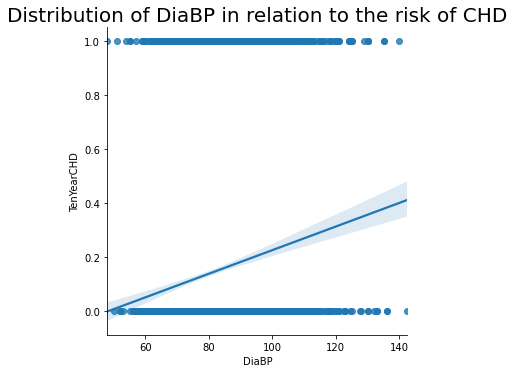

In [ ]:
plt.figure(figsize=(12,8), facecolor='w')
sns.lmplot(data=df, x="DiaBP", y="TenYearCHD")
plt.title("Distribution of DiaBP in relation to the risk of CHD", size=20)
plt.show()

#### Observation



<table align="left">
    <tr>
        
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21612C">
                    <b>From the above plot we see that:<ul>
                        <li>Minor relation found between higher risk of TenYearCHD with higher diaBP similar to the previous one</li>
                        <li>Majority of people with diaBP ranging upto 80.0 has lower chance of contracting the disease.</li>
                        
                        </ul></b>
                </font>
            </div>
        </td>
    </tr>
</table>

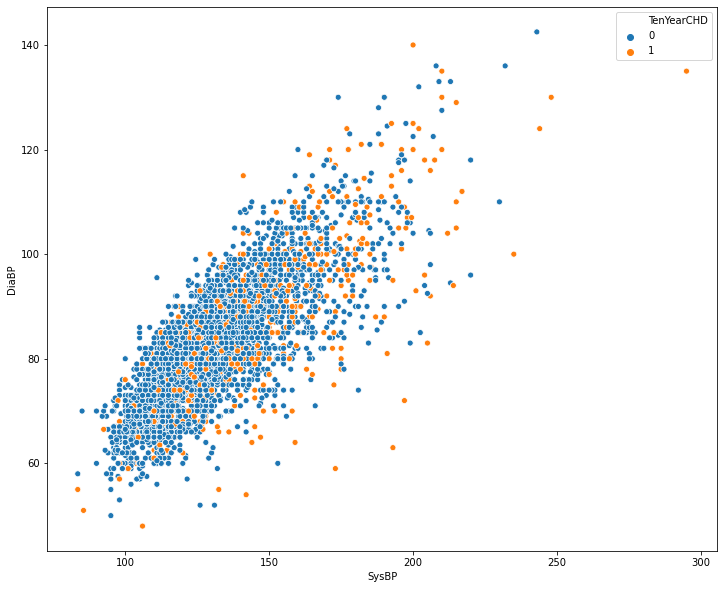

In [ ]:
plt.figure(figsize=(12,10), facecolor='w')
sns.scatterplot(data=df, x="SysBP", y="DiaBP", hue="TenYearCHD")
plt.show()

<a id='Discover Outliers'></a>
## 3.10 Discover Outliers

An outlier is an observation that appears to deviate distinctly from other observations in the data. If the outliers are not removed, the model accuracy may decrease.

In order to detect outliers in numerical data, we perform the following:
1. Plot boxplot for numerical data
2. Note the variables for which outliers are present
3. Remove outliers by IQR method
4. Plot boxplot to recheck for outliers

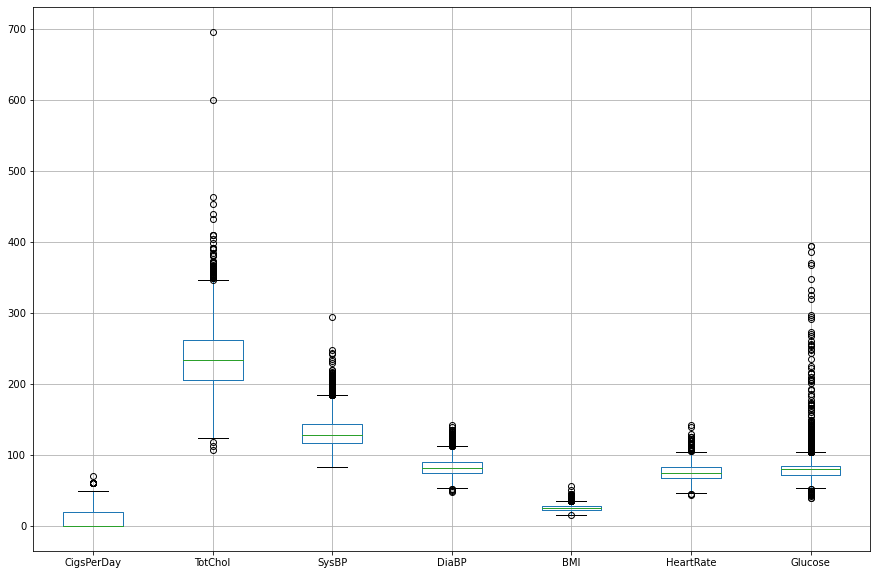

In [ ]:
plt.figure(figsize = (15,10))
df.boxplot(column = ['CigsPerDay', 'TotChol', 'SysBP', 'DiaBP', 'BMI', 'HeartRate', 'Glucose'])
plt.show()

#### Observation

<table align="left">
    <tr>
        
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21612C">
                    
                    <b>From the above plot we see that:<ul>
                   <li> We have outliers in the following columns: cigsPerDay, totChol, sysBP, diaBP, BMI, heartRate, glucose</li>
                   <li> Out of them we have extremities in 'totChol' and 'sysBP' the rest of the outliers are close to the upper whisker which are considerable.</li>
                       <li>As the assumption states that there should be no outliers in our data. We will try to manipulate the data to fit in our range.</li>
                    
                        </ul></b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Removing the Outliers

In [ ]:
# calculate interquartile range 

# compute the first quartile using quantile(0.25)
# use .drop() to drop the target variable 
# axis=1: specifies that the labels are dropped from the columns
q1 = df.drop('TenYearCHD', axis = 1).quantile(0.25)

# compute the first quartile using quantile(0.75)
# use .drop() to drop the target variable 
# axis=1: specifies that the labels are dropped from the columns
q3 = df.drop('TenYearCHD', axis = 1).quantile(0.75)

# calculate of interquartile range 
IQR = q3 - q1

LL = q1 - 1.5 * IQR
UL = q3 + 1.5 * IQR

df = df[~((df < LL) | (df > UL)).any(axis = 1)]

C:\Users\Ved\AppData\Local\Temp\ipykernel_14756\616515036.py:19: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < LL) | (df > UL)).any(axis = 1)]


#### Checking if the outliers are removed

A simple way to know whether the outliers have been removed or not is to check the dimensions of the data. If the dimensions are reduced that implies outliers are removed

In [ ]:
df.shape

(3506, 15)

#### Plot boxplot to recheck for outliers

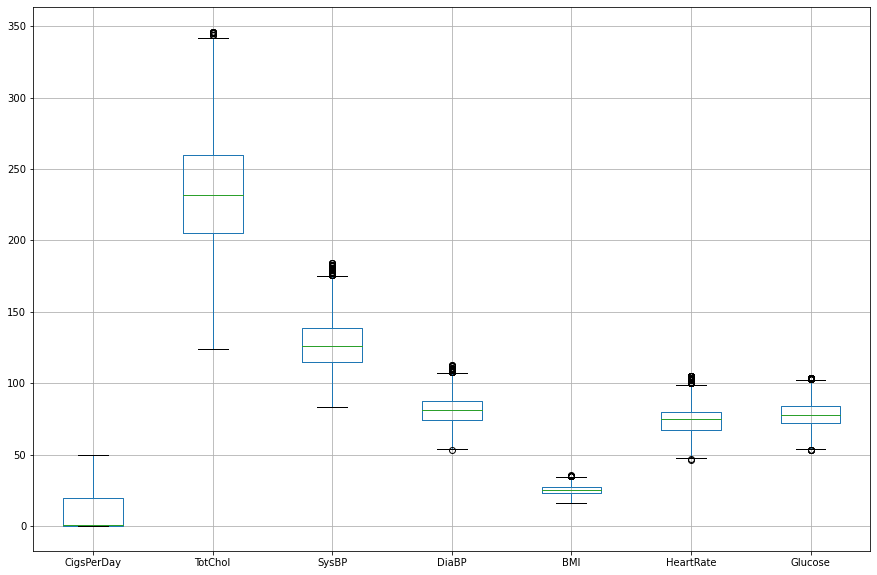

In [ ]:
plt.figure(figsize = (15,10))
df.boxplot(column = ['CigsPerDay', 'TotChol', 'SysBP', 'DiaBP', 'BMI', 'HeartRate', 'Glucose'])
plt.show()

Observing the range of the boxplot, we say that the outliers are removed from the original data. The new 'outliers' that you see are moderate outliers that lie within the min/max range before removing the actual outliers

### Recheck the Correlation

Recheck the correlation after treating outliers. An outlier might either decrease or increase a correlation coefficient, depending on where it is in relation to the other points

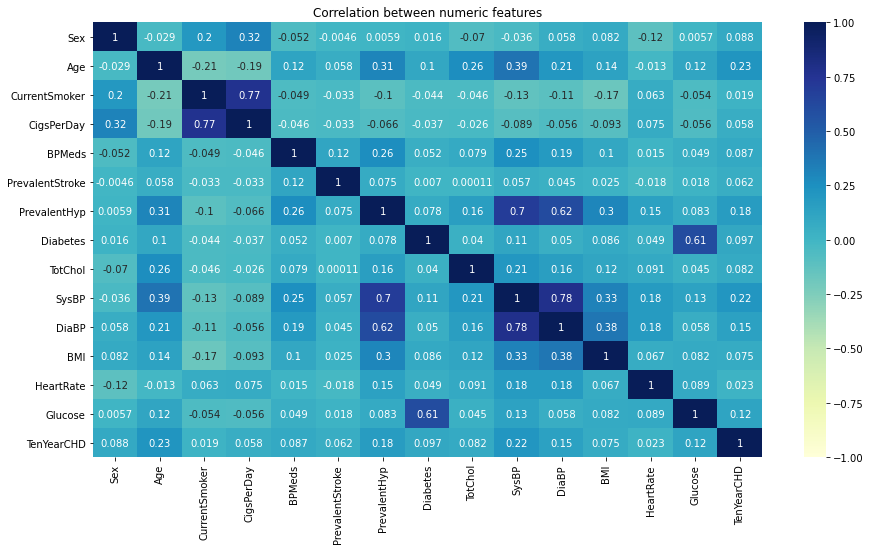

In [ ]:
# set the figure size
plt.figure(figsize=(15, 8))

sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True)

# specify name of the plot
plt.title('Correlation between numeric features')

# display the plot
plt.show()

# 4 Base Model Making

In [ ]:
X = df.drop('TenYearCHD', axis = 1)
y = df['TenYearCHD']

## 4.1 Naive Bayes

Naïve Bayes Classification is based on the probability of occurrences of the output. 

It assumes that every feature is independent and calculates the relative occurrence of the output for given input based on the output dependency on the given independent attributes. 

In [ ]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from matplotlib import pyplot

#### Split the data


In [ ]:
ss = StandardScaler()
X_s = ss.fit_transform(X)

X_s = pd.DataFrame(X_s, columns = X.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size = 0.3, random_state = 10)

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = nb.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[825,  85],
       [110,  32]], dtype=int64)

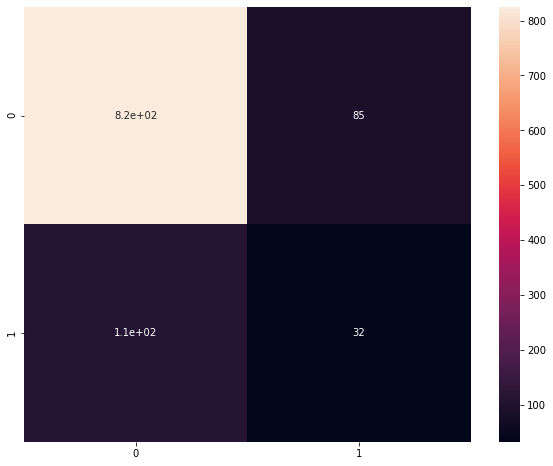

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.show()

In [ ]:
y_prob = nb.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)


thresholds[0] = thresholds[0] - 1

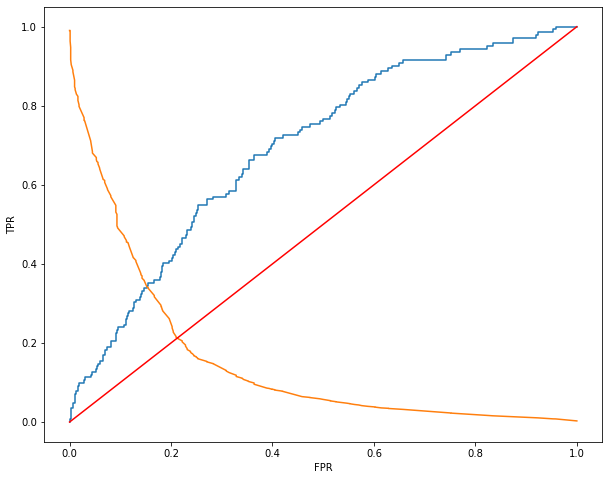

In [ ]:
plt.plot(fpr,tpr)
plt.plot(fpr,thresholds)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr,fpr,color='r')
plt.show()

In [ ]:
y_train_pred = nb.predict(X_train)
y_train_prob = nb.predict_proba(X_train)[:, 1]

roc_sc_train_NB = roc_auc_score(y_train, y_train_prob)
acc_train_NB = accuracy_score(y_train, y_train_pred)
prec_train_NB = precision_score(y_train, y_train_pred)
f1_train_NB = f1_score(y_train, y_train_pred)
recall_train_NB = recall_score(y_train, y_train_pred)

print("Train Set: ")
print("ROC Score: ", roc_sc_train_NB)
print("Accuracy Score: ", acc_train_NB)


y_test_pred = nb.predict(X_test)
y_test_prob = nb.predict_proba(X_test)[:, 1]

roc_sc_test_NB = roc_auc_score(y_test, y_test_prob)
acc_test_NB = accuracy_score(y_test, y_test_pred)
f1_test_NB = f1_score(y_test, y_test_pred)
recall_test_NB = recall_score(y_test, y_test_pred)
prec_test_NB = precision_score(y_test, y_test_pred)

print("Test Set: ")
print("ROC Score: ", roc_sc_test_NB)
print("Accuracy Score: ", acc_test_NB)

Train Set: 
ROC Score:  0.7015140199606218
Accuracy Score:  0.8243683781581093
Test Set: 
ROC Score:  0.6946602693081565
Accuracy Score:  0.814638783269962


Here you can see that our model is overfitting. 

# 4.2 KNeighborsClassifier

KNN belongs to the class of supervised learning. It is also known as a lazy learning classifier. 
        
This algorithm does not construct the model from the data. 
        
It classifies the input based on its nearest k training instances and decides its class based on the similarity of the k nearest neighbors it uses Euclidean distance to calculate the distance of an     attribute from its neighbors

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size = 0.3, random_state = 10)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_train_pred = knn.predict(X_train)
y_train_prob = knn.predict_proba(X_train)[:, 1]

roc_sc_train_KNN = roc_auc_score(y_train, y_train_prob)
acc_train_KNN = accuracy_score(y_train, y_train_pred)
prec_train_KNN = precision_score(y_train, y_train_pred)
f1_train_KNN = f1_score(y_train, y_train_pred)
recall_train_KNN = recall_score(y_train, y_train_pred)

print("Train Set: ")
print("ROC Score: ", roc_sc_train_KNN)
print("Accuracy Score: ", acc_train_KNN)


y_test_pred = knn.predict(X_test)
y_test_prob = knn.predict_proba(X_test)[:, 1]

roc_sc_test_KNN = roc_auc_score(y_test, y_test_prob)
acc_test_KNN = accuracy_score(y_test, y_test_pred)
f1_test_KNN = f1_score(y_test, y_test_pred)
recall_test_KNN = recall_score(y_test, y_test_pred)
prec_test_KNN = precision_score(y_test, y_test_pred)

print("Test Set: ")
print("ROC Score: ", roc_sc_test_KNN)
print("Accuracy Score: ", acc_test_KNN)

Train Set: 
ROC Score:  0.8945225217069876
Accuracy Score:  0.8879380603096985
Test Set: 
ROC Score:  0.5877921374400248
Accuracy Score:  0.8460076045627376


### Tuning using GridSearchCV

In [ ]:
knn = KNeighborsClassifier()

param = {'n_neighbors': np.arange(1, 25, 2),
         'metric': ['hamming','euclidean','manhattan','Chebyshev']}

gsearch = GridSearchCV(estimator = knn, param_grid = param, cv = 3, scoring = 'accuracy', n_jobs=-1)

gsearch.fit(X_train, y_train)

C:\Users\Ved\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.80358598 0.8594132  0.86919315 0.87041565 0.87163814 0.87286064
 0.87286064 0.87286064 0.87326813 0.87367563 0.87408313 0.87408313
 0.81214344 0.85656072 0.87000815 0.87123064 0.87530562 0.87571312
 0.87612062 0.87612062 0.87571312 0.87571312 0.87449063 0.87367563
 0.81744091 0.85126324 0.86634067 0.87163814 0.87204564 0.87571312
 0.87449063 0.87530562 0.87489813 0.87449063 0.87408313 0.87408313
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan]
  warnings.warn(


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['hamming', 'euclidean', 'manhattan',
                                    'Chebyshev'],
                         'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23])},
             scoring='accuracy')

In [ ]:
gsearch.best_params_

{'metric': 'euclidean', 'n_neighbors': 15}

In [ ]:
knn = KNeighborsClassifier(**gsearch.best_params_)
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=15)

In [ ]:
y_train_pred = knn.predict(X_train)
y_train_prob = knn.predict_proba(X_train)[:, 1]

roc_sc_train_KNN_GSCV = roc_auc_score(y_train, y_train_prob)
acc_train_KNN_GSCV = accuracy_score(y_train, y_train_pred)
prec_train_KNN_GSCV = precision_score(y_train, y_train_pred)
f1_train_KNN_GSCV = f1_score(y_train, y_train_pred)
recall_train_KNN_GSCV = recall_score(y_train, y_train_pred)

print("Train Set: ")
print("ROC Score: ", roc_sc_train_KNN_GSCV)
print("Accuracy Score: ", acc_train_KNN_GSCV)


y_test_pred = knn.predict(X_test)
y_test_prob = knn.predict_proba(X_test)[:, 1]

roc_sc_test_KNN_GSCV = roc_auc_score(y_test, y_test_prob)
acc_test_KNN_GSCV = accuracy_score(y_test, y_test_pred)
f1_test_KNN_GSCV = f1_score(y_test, y_test_pred)
recall_test_KNN_GSCV = recall_score(y_test, y_test_pred)
prec_test_KNN_GSCV = precision_score(y_test, y_test_pred)

print("Test Set: ")
print("ROC Score: ", roc_sc_test_KNN_GSCV)
print("Accuracy Score: ", acc_test_KNN_GSCV)

Train Set: 
ROC Score:  0.779351392943626
Accuracy Score:  0.8765281173594132
Test Set: 
ROC Score:  0.6310207398235568
Accuracy Score:  0.8640684410646388


# 4.3 Logistic Regression

Logistic regression is a supervised learning algorithm. 

It is a go-to algorithm for binary classification problems.

It is used when our data is not linearly separable and used to assign observations to a discrete set of classes in this algorithm; we use the sigmoid function for mapping our predictions to probabilities

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size = 0.3, random_state = 10)

In [ ]:
lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_train_pred = lr.predict(X_train)
y_train_prob = lr.predict_proba(X_train)[:, 1]

roc_sc_train_LR = roc_auc_score(y_train, y_train_prob)
acc_train_LR = accuracy_score(y_train, y_train_pred)
prec_train_LR = precision_score(y_train, y_train_pred)
f1_train_LR = f1_score(y_train, y_train_pred)
recall_train_LR = recall_score(y_train, y_train_pred)

print("Train Set: ")
print("ROC Score: ", roc_sc_train_LR)
print("Accuracy Score: ", acc_train_LR)


y_test_pred = lr.predict(X_test)
y_test_prob = lr.predict_proba(X_test)[:, 1]

roc_sc_test_LR = roc_auc_score(y_test, y_test_prob)
acc_test_LR = accuracy_score(y_test, y_test_pred)
f1_test_LR = f1_score(y_test, y_test_pred)
recall_test_LR = recall_score(y_test, y_test_pred)
prec_test_LR = precision_score(y_test, y_test_pred)

print("Test Set: ")
print("ROC Score: ", roc_sc_test_LR)
print("Accuracy Score: ", acc_test_LR)

Train Set: 
ROC Score:  0.7276121936316111
Accuracy Score:  0.8724531377343113
Test Set: 
ROC Score:  0.7136666150750658
Accuracy Score:  0.8669201520912547


## Evaluation Metrics

In [ ]:
Base_Model = pd.DataFrame({'Accuracy_Train': [roc_sc_train_NB, roc_sc_train_KNN, roc_sc_train_KNN_GSCV, roc_sc_train_LR],
                   'AUC_Train': [acc_train_NB, acc_train_KNN, acc_train_KNN_GSCV, acc_train_LR],
                   'F1_Score_Train': [f1_train_NB, f1_train_KNN, f1_train_KNN_GSCV, f1_train_LR],
                   'Recall_Train': [recall_train_NB, recall_train_KNN, recall_train_KNN_GSCV, recall_train_LR],
                   'Precision_Train': [prec_train_NB, prec_train_KNN, prec_train_KNN_GSCV, prec_train_LR],
                   
                   'Accuracy': [acc_test_NB, acc_test_KNN, acc_test_KNN_GSCV, acc_test_LR],
                   'AUC': [roc_sc_test_NB, roc_sc_test_KNN, roc_sc_test_KNN_GSCV, roc_sc_test_LR],
                   'F1_Score': [f1_test_NB, f1_test_KNN, f1_test_KNN_GSCV, f1_test_LR],
                   'Recall': [recall_test_NB, recall_test_KNN, recall_test_KNN_GSCV, recall_test_LR],
                   'Precision': [prec_test_NB, prec_test_KNN, prec_test_KNN_GSCV, prec_test_LR]},
                  index = ['Naive Bayes', 'KNeighbors Classifier', 'KNeighbors Classifier GSCV', 'Logistic Regression'])
Base_Model

,Accuracy_Train,AUC_Train,F1_Score_Train,Recall_Train,Precision_Train,Accuracy,AUC,F1_Score,Recall,Precision
Naive Bayes,0.701514,0.824368,0.263248,0.249191,0.278986,0.814639,0.694660,0.247104,0.225352,0.273504
KNeighbors Classifier,0.894523,0.887938,0.293059,0.184466,0.712500,0.846008,0.587792,0.089888,0.056338,0.222222
KNeighbors Classifier GSCV,0.779351,0.876528,0.056075,0.029126,0.750000,0.864068,0.631021,0.013793,0.007042,0.333333
Logistic Regression,0.727612,0.872453,0.024922,0.012945,0.333333,0.866920,0.713667,0.054054,0.028169,0.666667


# 5 Over Sampling

SMOTE is an approach to address the imbalanced dataset by duplicating examples in the minority class or generating synthetic samples for the minority class.

In [ ]:
X = df.drop('TenYearCHD', axis = 1)
y = df['TenYearCHD']

In [ ]:
df['TenYearCHD'].value_counts()

0    3055
1     451
Name: TenYearCHD, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority', random_state = 1)

X_sm, y_sm= smote.fit_resample(X, y)

NameError: name 'X' is not defined

In [ ]:
print('len0:', len(y_sm[y_sm == 0]))
print('len1:', len(y_sm[y_sm == 1]))

len0: 3055
len1: 3055


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.3, random_state = 42)

#  6.1 Decision Tree Classifier

In this technique, the attributes will be arranged in a multi-level tree-like structure, where the most significant attributes are placed at the roots and the least significant attributes are placed at the leaves. 

Here significance is calculated by the entropy of the attributes.

The decision will be taken according to the traversal of the tree for the given input.

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
imp = pd.DataFrame({"Features": X_train.columns, "Importance": dtree.feature_importances_})
imp.sort_values(by = 'Importance')

,Features,Importance
4,BPMeds,0.000000
5,PrevalentStroke,0.000000
7,Diabetes,0.000000
6,PrevalentHyp,0.008668
0,Sex,0.009793
2,CurrentSmoker,0.057956
11,BMI,0.079836
10,DiaBP,0.090860
12,HeartRate,0.100528
13,Glucose,0.118174


In [ ]:
X_sm = X_sm.drop(['BPMeds', 'PrevalentStroke', 'Diabetes'], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.3, random_state = 42)

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_train_pred = dtree.predict(X_train)
y_train_prob = dtree.predict_proba(X_train)[:, 1]

roc_sc_train_dt = roc_auc_score(y_train, y_train_prob)
acc_train_dt = accuracy_score(y_train, y_train_pred)
prec_train_dt = precision_score(y_train, y_train_pred)
f1_train_dt = f1_score(y_train, y_train_pred)
recall_train_dt = recall_score(y_train, y_train_pred)

print("Train Set: ")
print("ROC Score: ", roc_sc_train_dt)
print("Accuracy Score: ", acc_train_dt)


y_test_pred = dtree.predict(X_test)
y_test_prob = dtree.predict_proba(X_test)[:, 1]

roc_sc_test_dt = roc_auc_score(y_test, y_test_prob)
acc_test_dt = accuracy_score(y_test, y_test_pred)
f1_test_dt = f1_score(y_test, y_test_pred)
prec_test_dt = precision_score(y_train, y_train_pred)
recall_test_dt = recall_score(y_test, y_test_pred)

print("Test Set: ")
print("ROC Score: ", roc_sc_test_dt)
print("Accuracy Score: ", acc_test_dt)

Train Set: 
ROC Score:  1.0
Accuracy Score:  1.0
Test Set: 
ROC Score:  0.8116811108781827
Accuracy Score:  0.8112384069830878


### 6.1.2 Tuning with Grid Search CV

In [ ]:
dtree = DecisionTreeClassifier(random_state = 1)

param = {'criterion': ["gini", "entropy"],
         'max_depth': [2,3,4,5,6],
         'min_samples_split': [2,3,4,5,6,7,8,9,10],
         'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]}

gsearch = GridSearchCV(estimator = dtree, param_grid = param, cv = 3)
gsearch.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [ ]:
gsearch.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
dtree = DecisionTreeClassifier(**gsearch.best_params_)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [ ]:
y_train_pred = dtree.predict(X_train)
y_train_prob = dtree.predict_proba(X_train)[:, 1]

roc_sc_train_GSCV = roc_auc_score(y_train, y_train_prob)
acc_train_GSCV = accuracy_score(y_train, y_train_pred)
f1_train_GSCV = f1_score(y_train, y_train_pred)
recall_train_GSCV = recall_score(y_train, y_train_pred)
prec_train_GSCV = precision_score(y_train, y_train_pred)


print("Train Set: ")
print("ROC Score: ", roc_sc_train_GSCV)
print("Accuracy Score: ", acc_train_GSCV)


y_test_pred = dtree.predict(X_test)
y_test_prob = dtree.predict_proba(X_test)[:, 1]

roc_sc_test_GSCV = roc_auc_score(y_test, y_test_prob)
acc_test_GSCV = accuracy_score(y_test, y_test_pred)
f1_test_GSCV = f1_score(y_test, y_test_pred)
recall_test_GSCV = recall_score(y_test, y_test_pred)
prec_test_GSCV = precision_score(y_test, y_test_pred)


print("Test Set: ")
print("ROC Score: ", roc_sc_test_GSCV)
print("Accuracy Score: ", acc_test_GSCV)

Train Set: 
ROC Score:  0.8230799022560106
Accuracy Score:  0.7379003974748656
Test Set: 
ROC Score:  0.7814352178304619
Accuracy Score:  0.701582105837425


### 6.1.3 Randomized Search CV

In [ ]:
dtree = DecisionTreeClassifier(random_state = 1)

param = {'criterion': ["gini", "entropy"],
         'max_depth': sp_randint(2,25),
         'min_samples_split': sp_randint(2,25),
         'min_samples_leaf': sp_randint(2,25)}

rsearch = RandomizedSearchCV(estimator = dtree, param_distributions = param, cv = 3)
rsearch.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A5B83C1D30>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A5B60C1820>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A5B83C1A30>})

In [ ]:
rsearch.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 2,
 'min_samples_split': 16}

In [ ]:
dtree = DecisionTreeClassifier(**rsearch.best_params_)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=16)

In [ ]:
y_train_pred = dtree.predict(X_train)
y_train_prob = dtree.predict_proba(X_train)[:, 1]

roc_sc_train_RSCV = roc_auc_score(y_train, y_train_prob)
acc_train_RSCV = accuracy_score(y_train, y_train_pred)
f1_train_RSCV = f1_score(y_train, y_train_pred)
recall_train_RSCV = recall_score(y_train, y_train_pred)
prec_train_RSCV = precision_score(y_train, y_train_pred)


print("Train Set: ")
print("ROC Score: ", roc_sc_train_RSCV)
print("Accuracy Score: ", acc_train_RSCV)


y_test_pred = dtree.predict(X_test)
y_test_prob = dtree.predict_proba(X_test)[:, 1]

roc_sc_test_RSCV = roc_auc_score(y_test, y_test_prob)
acc_test_RSCV = accuracy_score(y_test, y_test_pred)
f1_test_RSCV = f1_score(y_test, y_test_pred)
recall_test_RSCV = recall_score(y_test, y_test_pred)
prec_test_RSCV = precision_score(y_test, y_test_pred)


print("Test Set: ")
print("ROC Score: ", roc_sc_test_RSCV)
print("Accuracy Score: ", acc_test_RSCV)

Train Set: 
ROC Score:  0.9667801429420555
Accuracy Score:  0.8931494037877017
Test Set: 
ROC Score:  0.8591784666107638
Accuracy Score:  0.7997817785051827


In [ ]:
DT = pd.DataFrame({'Accuracy_Train': [roc_sc_train_dt, roc_sc_train_GSCV, roc_sc_train_RSCV],
                   'AUC_Train': [acc_train_dt, acc_train_GSCV, acc_train_RSCV],
                   'F1_Score_Train': [f1_train_dt, f1_train_GSCV, f1_train_RSCV],
                   'Recall_Train': [recall_train_dt, recall_train_GSCV, recall_train_RSCV],
                   'Precision_Train': [prec_train_dt, prec_train_RSCV, prec_train_GSCV],
                   
                   'Accuracy': [acc_test_dt, acc_test_GSCV, acc_test_RSCV],
                   'AUC': [roc_sc_test_dt, roc_sc_test_GSCV, roc_sc_test_RSCV],
                   'F1_Score': [f1_test_dt, f1_test_GSCV, f1_test_RSCV],
                   'Recall': [recall_test_dt, recall_test_GSCV, recall_test_RSCV],
                  'Precision': [prec_test_dt, prec_test_RSCV, prec_test_GSCV]},
                  index = ['Decision Tree', 'Decision Tree GSCV', 'Decision Tree RSCV'])
DT

,Accuracy_Train,AUC_Train,F1_Score_Train,Recall_Train,Precision_Train,Accuracy,AUC,F1_Score,Recall,Precision
Decision Tree,1.00000,1.000000,1.000000,1.000000,1.000000,0.811238,0.811681,0.811547,0.831473,1.000000
Decision Tree GSCV,0.82308,0.737900,0.757202,0.809634,0.900282,0.701582,0.781435,0.718187,0.777902,0.792265
Decision Tree RSCV,0.96678,0.893149,0.893349,0.886522,0.711147,0.799782,0.859178,0.796224,0.800223,0.666986


# 6 Advanced Modelling

# 6.1 RandomForestClassifier

Random forest is an ensemble learning algorithm, it is based on decision tree algorithm, this classifier creates a set of decision trees from randomly selected subsets of training data set, it then undergoes a voting process from different decision trees and then it decides the final class for the test data set.

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_train_pred = rf.predict(X_train)
y_train_prob = rf.predict_proba(X_train)[:, 1]

roc_sc_train_RF = roc_auc_score(y_train, y_train_prob)
acc_train_RF = accuracy_score(y_train, y_train_pred)
f1_train_RF = f1_score(y_train, y_train_pred)
recall_train_RF = recall_score(y_train, y_train_pred)
prec_train_RF = precision_score(y_train, y_train_pred)

print("Train Set: ")
print("ROC Score: ", roc_sc_train_RF)
print("Accuracy Score: ", acc_train_RF)


y_test_pred = rf.predict(X_test)
y_test_prob = rf.predict_proba(X_test)[:, 1]

roc_sc_test_RF = roc_auc_score(y_test, y_test_prob)
acc_test_RF = accuracy_score(y_test, y_test_pred)
f1_test_RF = f1_score(y_test, y_test_pred)
recall_test_RF = recall_score(y_test, y_test_pred)
prec_test_RF = precision_score(y_test, y_test_pred)

print("Test Set: ")
print("ROC Score: ", roc_sc_test_RF)
print("Accuracy Score: ", acc_test_RF)

Train Set: 
ROC Score:  1.0
Accuracy Score:  1.0
Test Set: 
ROC Score:  0.9645954032626924
Accuracy Score:  0.9056192034915439


### 6.1.1 Tuning with GridSearchCV

In [ ]:
rf = RandomForestClassifier()

param = {'max_depth': [2, 3, 4],
         'bootstrap': [True, False],
         'max_features': ['auto', 'sqrt', 'log2', None],
         'criterion': ['gini', 'entropy']}

gsearch = GridSearchCV(rf, cv = 10, param_grid = param, n_jobs = 3)

gsearch.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=3,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'max_features': ['auto', 'sqrt', 'log2', None]})

In [ ]:
gsearch.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': None}

In [ ]:
rf = RandomForestClassifier(**gsearch.best_params_)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, max_features=None)

In [ ]:
y_train_pred = rf.predict(X_train)
y_train_prob = rf.predict_proba(X_train)[:, 1]

roc_sc_train_GSCV_RF = roc_auc_score(y_train, y_train_prob)
acc_train_GSCV_RF = accuracy_score(y_train, y_train_pred)
f1_train_GSCV_RF = f1_score(y_train, y_train_pred)
recall_train_GSCV_RF = recall_score(y_train, y_train_pred)
prec_train_GSCV_RF = precision_score(y_train, y_train_pred)

print("Train Set: ")
print("ROC Score: ", roc_sc_train_GSCV_RF)
print("Accuracy Score: ", acc_train_GSCV_RF)


y_test_pred = rf.predict(X_test)
y_test_prob = rf.predict_proba(X_test)[:, 1]

roc_sc_test_GSCV_RF = roc_auc_score(y_test, y_test_prob)
acc_test_GSCV_RF = accuracy_score(y_test, y_test_pred)
f1_test_GSCV_RF = f1_score(y_test, y_test_pred)
recall_test_GSCV_RF = recall_score(y_test, y_test_pred)
prec_test_GSCV_RF = precision_score(y_test, y_test_pred)

print("Test Set: ")
print("ROC Score: ", roc_sc_test_GSCV_RF)
print("Accuracy Score: ", acc_test_GSCV_RF)

Train Set: 
ROC Score:  0.8042404131244966
Accuracy Score:  0.7112462006079028
Test Set: 
ROC Score:  0.7876355484830004
Accuracy Score:  0.6868521549372614


In [ ]:
RF = pd.DataFrame({'Accuracy_Train': [roc_sc_train_RF, roc_sc_train_GSCV_RF],
                   'AUC_Train': [acc_train_RF, acc_train_GSCV_RF],
                   'F1_Score_Train': [f1_train_RF, f1_train_GSCV_RF],
                   'Recall_Train': [recall_train_RF, recall_train_GSCV_RF],
                   'Precision_Train': [prec_train_RF, prec_train_GSCV_RF],
                   
                   'Accuracy': [acc_test_RF, acc_test_GSCV_RF],
                   'AUC': [roc_sc_test_RF, roc_sc_test_GSCV_RF],
                   'F1_Score': [f1_test_RF, f1_test_GSCV_RF],
                   'Recall': [recall_test_RF, recall_test_GSCV_RF],
                  'Precision': [prec_test_RF, prec_test_GSCV_RF]},
                  index = ['Random Forest', 'Random Forest GSCV'])
RF

,Accuracy_Train,AUC_Train,F1_Score_Train,Recall_Train,Precision_Train,Accuracy,AUC,F1_Score,Recall,Precision
Random Forest,1.00000,1.000000,1.000000,1.000000,1.000000,0.905619,0.964595,0.905101,0.920759,0.889968
Random Forest GSCV,0.80424,0.711246,0.737959,0.805465,0.680893,0.686852,0.787636,0.711558,0.790179,0.647166


# 6.2 AdaBoostClassifier

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [ ]:
rf = RandomForestClassifier()

ad = AdaBoostClassifier(base_estimator = rf)
ad.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier())

In [ ]:
y_train_pred = ad.predict(X_train)
y_train_prob = ad.predict_proba(X_train)[:, 1]

roc_sc_train_AD = roc_auc_score(y_train, y_train_prob)
acc_train_AD = accuracy_score(y_train, y_train_pred)
f1_train_AD = f1_score(y_train, y_train_pred)
recall_train_AD = recall_score(y_train, y_train_pred)
prec_train_AD = precision_score(y_train, y_train_pred)

print("Train Set: ")
print("ROC Score: ", roc_sc_train_AD)
print("Accuracy Score: ", acc_train_AD)


y_test_pred = ad.predict(X_test)
y_test_prob = ad.predict_proba(X_test)[:, 1]

roc_sc_test_AD = roc_auc_score(y_test, y_test_prob)
acc_test_AD = accuracy_score(y_test, y_test_pred)
f1_test_AD = f1_score(y_test, y_test_pred)
recall_test_AD = recall_score(y_test, y_test_pred)
prec_test_AD = precision_score(y_test, y_test_pred)

print("Test Set: ")
print("ROC Score: ", roc_sc_test_AD)
print("Accuracy Score: ", acc_test_AD)

Train Set: 
ROC Score:  0.9999999999999999
Accuracy Score:  1.0
Test Set: 
ROC Score:  0.9684015999008996
Accuracy Score:  0.911620294599018


In [ ]:
ad = AdaBoostClassifier(base_estimator = rf)

ensemble_params={'n_estimators':np.arange(1,200)}

gsearch = GridSearchCV(estimator = ad, param_grid = ensemble_params, cv = 3)
gsearch.fit(X_train, y_train)

gsearch.best_params_

ad = AdaBoostClassifier(base_estimator = rf, n_estimators = 158)
ad.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=158)

In [ ]:
y_train_pred = ad.predict(X_train)
y_train_prob = ad.predict_proba(X_train)[:, 1]

roc_sc_train_GSCV_AD = roc_auc_score(y_train, y_train_prob)
acc_train_GSCV_AD = accuracy_score(y_train, y_train_pred)
f1_train_GSCV_AD = f1_score(y_train, y_train_pred)
recall_train_GSCV_AD = recall_score(y_train, y_train_pred)
prec_train_GSCV_AD = precision_score(y_train, y_train_pred)

print("Train Set: ")
print("ROC Score: ", roc_sc_train_GSCV_AD)
print("Accuracy Score: ", acc_train_GSCV_AD)


y_test_pred = ad.predict(X_test)
y_test_prob = ad.predict_proba(X_test)[:, 1]

roc_sc_test_GSCV_AD = roc_auc_score(y_test, y_test_prob)
acc_test_GSCV_AD = accuracy_score(y_test, y_test_pred)
f1_test_GSCV_AD = f1_score(y_test, y_test_pred)
recall_test_GSCV_AD = recall_score(y_test, y_test_pred)
prec_test_GSCV_AD = precision_score(y_test, y_test_pred)

print("Test Set: ")
print("ROC Score: ", roc_sc_test_GSCV_AD)
print("Accuracy Score: ", acc_test_GSCV_AD)

Train Set: 
ROC Score:  1.0
Accuracy Score:  1.0
Test Set: 
ROC Score:  0.9680085331224272
Accuracy Score:  0.9105291871249318


In [ ]:
AD = pd.DataFrame({'Accuracy_Train': [roc_sc_train_AD, roc_sc_train_GSCV_AD],
                   'AUC_Train': [acc_train_AD, acc_train_GSCV_AD],
                   'F1_Score_Train': [f1_train_AD, f1_train_GSCV_AD],
                   'Recall_Train': [recall_train_AD, recall_train_GSCV_AD],
                   'Precision_Train': [prec_train_AD, prec_train_GSCV_AD],
                   
                   'Accuracy': [acc_test_AD, acc_test_GSCV_AD],
                   'AUC': [roc_sc_test_AD, roc_sc_test_GSCV_AD],
                   'F1_Score': [f1_test_AD, f1_test_GSCV_AD],
                   'Recall': [recall_test_AD, recall_test_GSCV_AD],
                  'Precision': [prec_test_AD, prec_test_GSCV_AD]},
                  index = ['Ada Boost', 'Ada Boost GSCV'])
AD

,Accuracy_Train,AUC_Train,F1_Score_Train,Recall_Train,Precision_Train,Accuracy,AUC,F1_Score,Recall,Precision
Ada Boost,1.0,1.0,1.0,1.0,1.0,0.911620,0.968402,0.910989,0.925223,0.897186
Ada Boost GSCV,1.0,1.0,1.0,1.0,1.0,0.910529,0.968009,0.910284,0.928571,0.892704


# 6.3 GradientBoostingClassifier

GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions.

In each stage n_classes_ regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. 

Binary classification is a special case where only a single regression tree is induced.

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_train_pred = gb.predict(X_train)
y_train_prob = gb.predict_proba(X_train)[:, 1]

roc_sc_train_GB = roc_auc_score(y_train, y_train_prob)
acc_train_GB = accuracy_score(y_train, y_train_pred)
f1_train_GB = f1_score(y_train, y_train_pred)
recall_train_GB = recall_score(y_train, y_train_pred)
prec_train_GB = precision_score(y_train, y_train_pred)

print("Train Set: ")
print("ROC Score: ", roc_sc_train_GB)
print("Accuracy Score: ", acc_train_GB)


y_test_pred = gb.predict(X_test)
y_test_prob = gb.predict_proba(X_test)[:, 1]

roc_sc_test_GB = roc_auc_score(y_test, y_test_prob)
acc_test_GB = accuracy_score(y_test, y_test_pred)
f1_test_GB = f1_score(y_test, y_test_pred)
recall_test_GB = recall_score(y_test, y_test_pred)
prec_test_GB = precision_score(y_test, y_test_pred)

print("Test Set: ")
print("ROC Score: ", roc_sc_test_GB)
print("Accuracy Score: ", acc_test_GB)

Train Set: 
ROC Score:  0.9359183793077356
Accuracy Score:  0.8576104746317512
Test Set: 
ROC Score:  0.9006767895258423
Accuracy Score:  0.8145117294053464


In [ ]:
GB = pd.DataFrame({'Accuracy_Train': [roc_sc_train_GB],
                   'AUC_Train': [acc_train_GB],
                   'F1_Score_Train': [f1_train_GB],
                   'Recall_Train': [recall_train_GB],
                   'Accuracy': [acc_test_GB],
                   'AUC': [roc_sc_test_GB],
                   'F1_Score': [f1_test_GB],
                   'Recall': [recall_test_GB]},
                  index = ['Gradient Boosting'])
GB

,Accuracy_Train,AUC_Train,F1_Score_Train,Recall_Train,Accuracy,AUC,F1_Score,Recall
Gradient Boosting,0.935918,0.85761,0.859321,0.86151,0.814512,0.900677,0.810479,0.811384


# 6.4 Light GBM Model

Light GBM is a gradient boosting framework based on decision trees to increases the efficiency of the model and reduces memory usage.

In [ ]:
lgbm = lgb.LGBMClassifier(random_state = 1)
lgbm.fit(X_train, y_train)

LGBMClassifier(random_state=1)

In [ ]:
y_train_pred = lgbm.predict(X_train)
y_train_prob = lgbm.predict_proba(X_train)[:, 1]

roc_sc_train_LGBM = roc_auc_score(y_train, y_train_prob)
acc_train_LGBM = accuracy_score(y_train, y_train_pred)
f1_train_LGBM = f1_score(y_train, y_train_pred)
recall_train_LGBM = recall_score(y_train, y_train_pred)
prec_train_LGBM = precision_score(y_train, y_train_pred)

print("Train Set: ")
print("ROC Score: ", roc_sc_train_LGBM)
print("Accuracy Score: ", acc_train_LGBM)


y_test_pred = lgbm.predict(X_test)
y_test_prob = lgbm.predict_proba(X_test)[:, 1]

roc_sc_test_LGBM = roc_auc_score(y_test, y_test_prob)
acc_test_LGBM = accuracy_score(y_test, y_test_pred)
f1_test_LGBM = f1_score(y_test, y_test_pred)
recall_test_LGBM = recall_score(y_test, y_test_pred)
prec_test_LGBM = precision_score(y_test, y_test_pred)

print("Test Set: ")
print("ROC Score: ", roc_sc_test_LGBM)
print("Accuracy Score: ", acc_test_LGBM)

Train Set: 
ROC Score:  0.9975010726558697
Accuracy Score:  0.9703062894552257
Test Set: 
ROC Score:  0.9573796500991005
Accuracy Score:  0.8990725586470267


### 6.4.1 Tuning with Randomized Search CV


In [ ]:
lgbm = lgb.LGBMClassifier()

params = {'num_leaves':sp_randint(10,50),
          'learning_rate':[0.025,0.05,0.075,0,1,0.125,0.150,0.175,0.2],
          'n_estimators': sp_randint(50,250),
          'max_depth': sp_randint(2,10),
          'min_child_samples' : sp_randint(1,20)}

rsearch = RandomizedSearchCV(estimator = lgbm, param_distributions = params, cv = 3)
rsearch.fit(X_train, y_train)

C:\Users\Ved\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ved\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ved\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 890, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "C:\Users\Ved\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 683, in fit
    self._Booster = train(params, train_set,
  File "C:\Users\Ved\anaconda3\lib\site-packages\lightgbm\engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\Ved\anaconda3\lib\site-packages\lightgbm\basic.py", line 2229, in __init__
    train_set.construct()


RandomizedSearchCV(cv=3, estimator=LGBMClassifier(),
                   param_distributions={'learning_rate': [0.025, 0.05, 0.075, 0,
                                                          1, 0.125, 0.15, 0.175,
                                                          0.2],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A5BBDAE850>,
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A5B7837D00>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A5B7837310>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A5B7837340>})

In [ ]:
rsearch.best_params_

{'learning_rate': 0.2,
 'max_depth': 8,
 'min_child_samples': 16,
 'n_estimators': 163,
 'num_leaves': 25}

In [ ]:
lgbm = lgb.LGBMClassifier(**rsearch.best_params_)
lgbm.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.2, max_depth=8, min_child_samples=16,
               n_estimators=163, num_leaves=25)

In [ ]:
y_train_pred = lgbm.predict(X_train)
y_train_prob = lgbm.predict_proba(X_train)[:, 1]

roc_sc_train_RSCV_LGBM = roc_auc_score(y_train, y_train_prob)
acc_train_RSCV_LGBM = accuracy_score(y_train, y_train_pred)
f1_train_RSCV_LGBM = f1_score(y_train, y_train_pred)
recall_train_RSCV_LGBM = recall_score(y_train, y_train_pred)
prec_train_RSCV_LGBM = precision_score(y_train, y_train_pred)

print("Train Set: ")
print("ROC Score: ", roc_sc_train_RSCV_LGBM)
print("Accuracy Score: ", acc_train_RSCV_LGBM)


y_test_pred = lgbm.predict(X_test)
y_test_prob = lgbm.predict_proba(X_test)[:, 1]

roc_sc_test_RSCV_LGBM = roc_auc_score(y_test, y_test_prob)
acc_test_RSCV_LGBM = accuracy_score(y_test, y_test_pred)
f1_test_RSCV_LGBM = f1_score(y_test, y_test_pred)
recall_test_RSCV_LGBM = recall_score(y_test, y_test_pred)
prec_test_RSCV_LGBM = precision_score(y_test, y_test_pred)

print("Test Set: ")
print("ROC Score: ", roc_sc_test_RSCV_LGBM)
print("Accuracy Score: ", acc_test_RSCV_LGBM)

Train Set: 
ROC Score:  1.0
Accuracy Score:  0.9995323825111059
Test Set: 
ROC Score:  0.9596606285256899
Accuracy Score:  0.9023458810692854


In [ ]:
LGBM = pd.DataFrame({'Accuracy_Train': [acc_train_LGBM, acc_train_RSCV_LGBM],
                   'AUC_Train': [roc_sc_train_LGBM, roc_sc_train_RSCV_LGBM],
                   'F1_Score_Train': [f1_train_LGBM, f1_train_RSCV_LGBM],
                   'Recall_Train': [recall_train_LGBM, recall_train_RSCV_LGBM],
                     'Precision_Train': [prec_train_LGBM, prec_train_RSCV_LGBM],
                     
                   'Accuracy': [acc_test_LGBM, acc_test_RSCV_LGBM],
                   'AUC': [roc_sc_test_LGBM, roc_sc_test_RSCV_LGBM],
                   'F1_Score': [f1_test_LGBM, f1_test_RSCV_LGBM],
                   'Recall': [recall_test_LGBM, recall_test_RSCV_LGBM],
                    'Precision': [prec_test_LGBM, prec_test_RSCV_LGBM]},
                  index = ['LGBM', 'LGBM RSCV'])
LGBM

,Accuracy_Train,AUC_Train,F1_Score_Train,Recall_Train,Precision_Train,Accuracy,AUC,F1_Score,Recall,Precision
LGBM,0.970306,0.997501,0.969998,0.950903,0.989875,0.899073,0.957380,0.894346,0.873884,0.915789
LGBM RSCV,0.999532,1.000000,0.999537,0.999074,1.000000,0.902346,0.959661,0.897889,0.878348,0.918320


# 7  Evaluation and Conclusion

In [ ]:
Model_EVAL = pd.DataFrame({'Accuracy_Train': [acc_train_RSCV, acc_train_GSCV_RF, acc_train_AD, acc_train_GB, acc_train_LGBM],
                   'AUC_Train': [roc_sc_train_RSCV, roc_sc_train_GSCV_RF, roc_sc_train_AD, roc_sc_train_GB, roc_sc_train_LGBM],
                   'F1_Score_Train': [f1_train_RSCV, f1_train_GSCV_RF, f1_train_AD, f1_train_GB, f1_train_LGBM],
                   'Recall_Train': [recall_train_RSCV, recall_train_GSCV_RF, recall_train_AD, recall_train_GB, recall_train_LGBM],
                    'Precision_Train': [prec_train_RSCV, prec_train_GSCV_RF, prec_train_AD, prec_train_GB, prec_train_LGBM],
                    
                   'Accuracy': [acc_test_RSCV, acc_test_GSCV_RF, acc_test_AD, acc_test_GB, acc_test_LGBM],
                   'AUC': [roc_sc_test_RSCV, roc_sc_test_GSCV_RF, roc_sc_test_AD, roc_sc_test_GB, roc_sc_test_LGBM],
                   'F1_Score': [f1_test_RSCV, f1_test_GSCV_RF, f1_test_AD, f1_test_GB, f1_test_LGBM],
                   'Recall': [recall_test_RSCV, recall_test_GSCV_RF, recall_test_AD, recall_test_GB, recall_test_LGBM],
                    'Precision': [prec_test_RSCV, prec_test_GSCV_RF, prec_test_AD, prec_test_GB, prec_test_LGBM]},
                         index = ['Decision Tree RSCV', 'Random Forest GSCV', 'Ada Boost', 'Gradient Boosting', 'LGBM'])
Model_EVAL.T

,Decision Tree RSCV,Random Forest GSCV,Ada Boost,Gradient Boosting,LGBM
Accuracy_Train,0.893149,0.711246,1.000000,0.857610,0.970306
AUC_Train,0.966780,0.804240,1.000000,0.935918,0.997501
F1_Score_Train,0.893349,0.737959,1.000000,0.859321,0.969998
Recall_Train,0.886522,0.805465,1.000000,0.861510,0.950903
Precision_Train,0.900282,0.680893,1.000000,0.857143,0.989875
Accuracy,0.799782,0.686852,0.911620,0.814512,0.899073
AUC,0.859178,0.787636,0.968402,0.900677,0.957380
F1_Score,0.796224,0.711558,0.910989,0.810479,0.894346
Recall,0.800223,0.790179,0.925223,0.811384,0.873884
Precision,0.792265,0.647166,0.897186,0.809577,0.915789


### Accuracy Comparison 

In [ ]:
Model_EVAL.T.iloc[5]

Decision Tree RSCV    0.799782
Random Forest GSCV    0.686852
Ada Boost             0.911620
Gradient Boosting     0.814512
LGBM                  0.899073
Name: Accuracy, dtype: float64

## Graphs for Algorithmic Comparison

Text(0.5, 1.0, 'Model Accuracy Comparision')

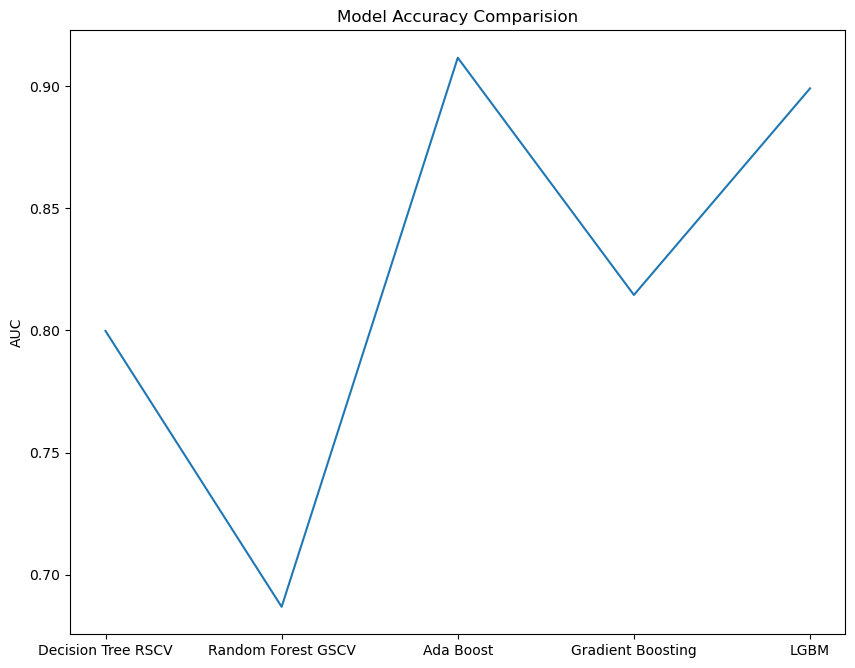

In [ ]:
plt.figure(figsize=(10,8), dpi=100)
plt.plot(Model_EVAL.T.columns.T,Model_EVAL.T.iloc[5])
plt.ylabel('AUC')
plt.title('Model Accuracy Comparision')

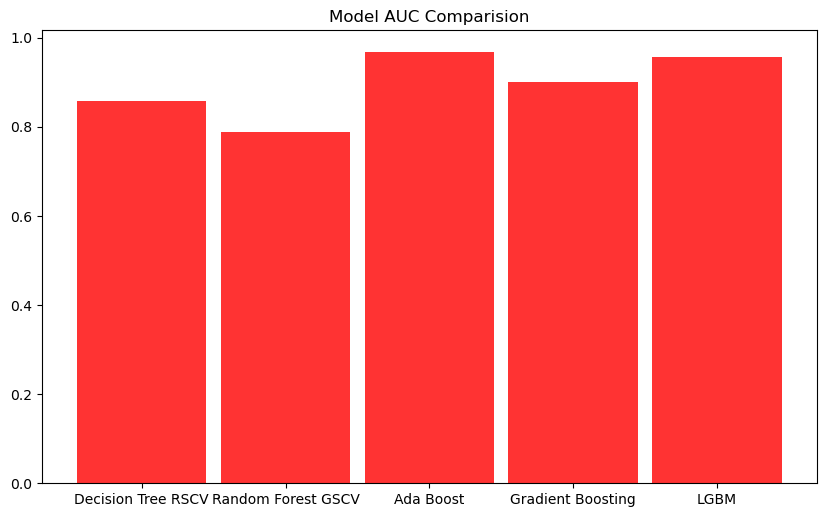

In [ ]:
plt.figure(figsize=(10,6), dpi=100)
plt.bar(Model_EVAL.T.columns.T,Model_EVAL.T.iloc[6], width=0.9, alpha=0.8, color='red')
plt.xticks(Model_EVAL.T.columns)
plt.title('Model AUC Comparision')
plt.show()

In [ ]:
xpos = np.array(list(range(len(Model_EVAL.T.columns))))
xpos

array([0, 1, 2, 3, 4])

In [ ]:
df2 = Model_EVAL[['Accuracy','AUC','F1_Score','Recall']]

Text(0.5, 1.0, 'Comparison of all models')

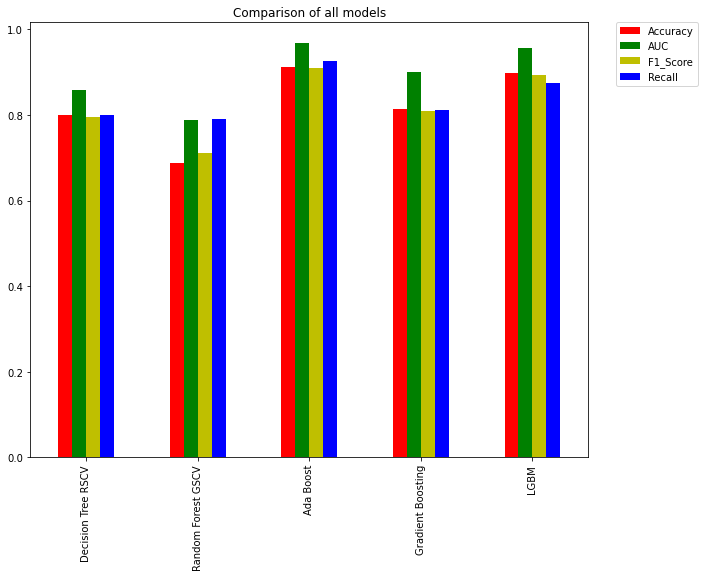

In [ ]:
plt.rcParams['figure.figsize'] = (10, 8)
df2.plot(kind='bar', color=['r','g','y','b'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Comparison of all models")

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Prediction of ten years risk of coronary heart disease is an ass important as predicting or diagnosing the disease in the medical field as it can save a person’s life by giving him precautions. So, the above prediction’s made have a significant impact on treatment. In this project, we have created various classification models of heart disease prediction using various machine learning classification algorithms and the algorithmic performance is analyzed. 
                    <br><br>We have compared the performances using the evaluation metrics like accuracy,precision, recall, AUC , F1 Score. Considering these factors, we can conclude that " LGBM RSCV and Gradient Boosting " algorithms are found to be more accurate in terms of accuracy  value.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>
